# Breast Cancer Prediction: A Comparative Study of Machine Learning and Deep learning Models

Breast cancer is one of the most prevalent types of cancer worldwide and remains a leading cause of death among women. Early detection plays a critical role in improving survival rates and reducing treatment costs. With advancements in data science, predictive models leveraging machine learning (ML) and deep learning (DL) techniques have shown great promise in assisting medical professionals with early diagnosis.

This project aims to explore the effectiveness of machine learning and deep learning approaches in predicting breast cancer by comparing their accuracies.  The dataset used for this study includes features derived from breast cancer histopathology images, patient data, or commonly used benchmark datasets like the Wisconsin Breast Cancer Dataset.

Through this comparison, we will evaluate key performance metrics, including accuracy, precision, recall, and F1-score, to determine the strengths and limitations of each approach. Our goal is to provide insights into which technique is more suitable for this important healthcare problem.



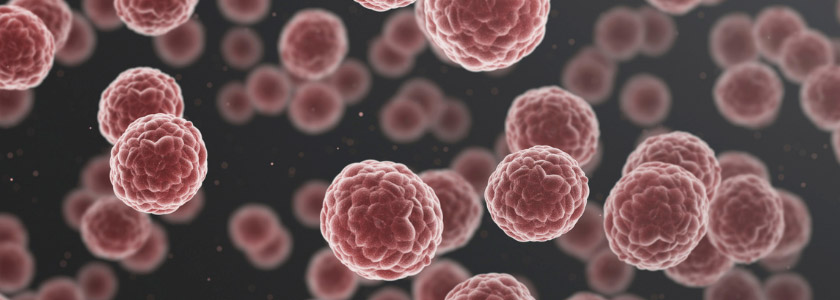

In [3]:
# import initial libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/Breast_Cancer_dataset.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# basic information about the csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# statistical summary of data
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.shape

(569, 33)

In [9]:
# dropping unnecessary columns "id" and "Unnamed: 32"
data = df.drop(['id','Unnamed: 32'], axis=1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
# final shape of data
data.shape

(569, 31)

In [11]:
# check null values
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [12]:
# check duplicacies
data.duplicated().sum()

0

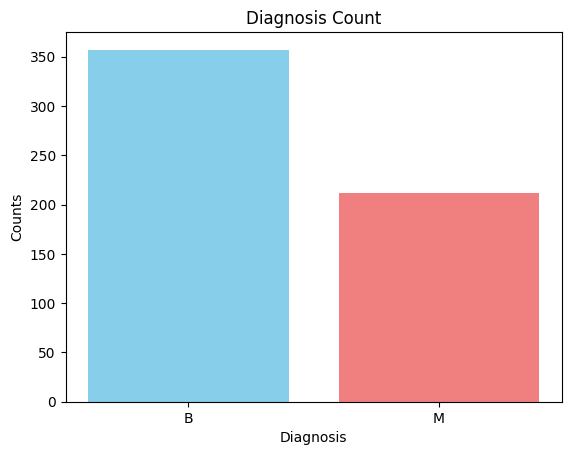

In [13]:
diagnosis_counts = data['diagnosis'].value_counts()

plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Counts')
plt.show()

In [14]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
# categorical column
cat_col = [i for i in data.columns if data[i].dtype == 'object']
cat_col

['diagnosis']

In [16]:
# numerical column
num_col = [i for i in data.columns if data[i].dtype != 'object']
num_col

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [17]:
print("Number of Categrical Column is", len(cat_col))
print("Number of Numerical Column is", len(num_col))

Number of Categrical Column is 1
Number of Numerical Column is 30


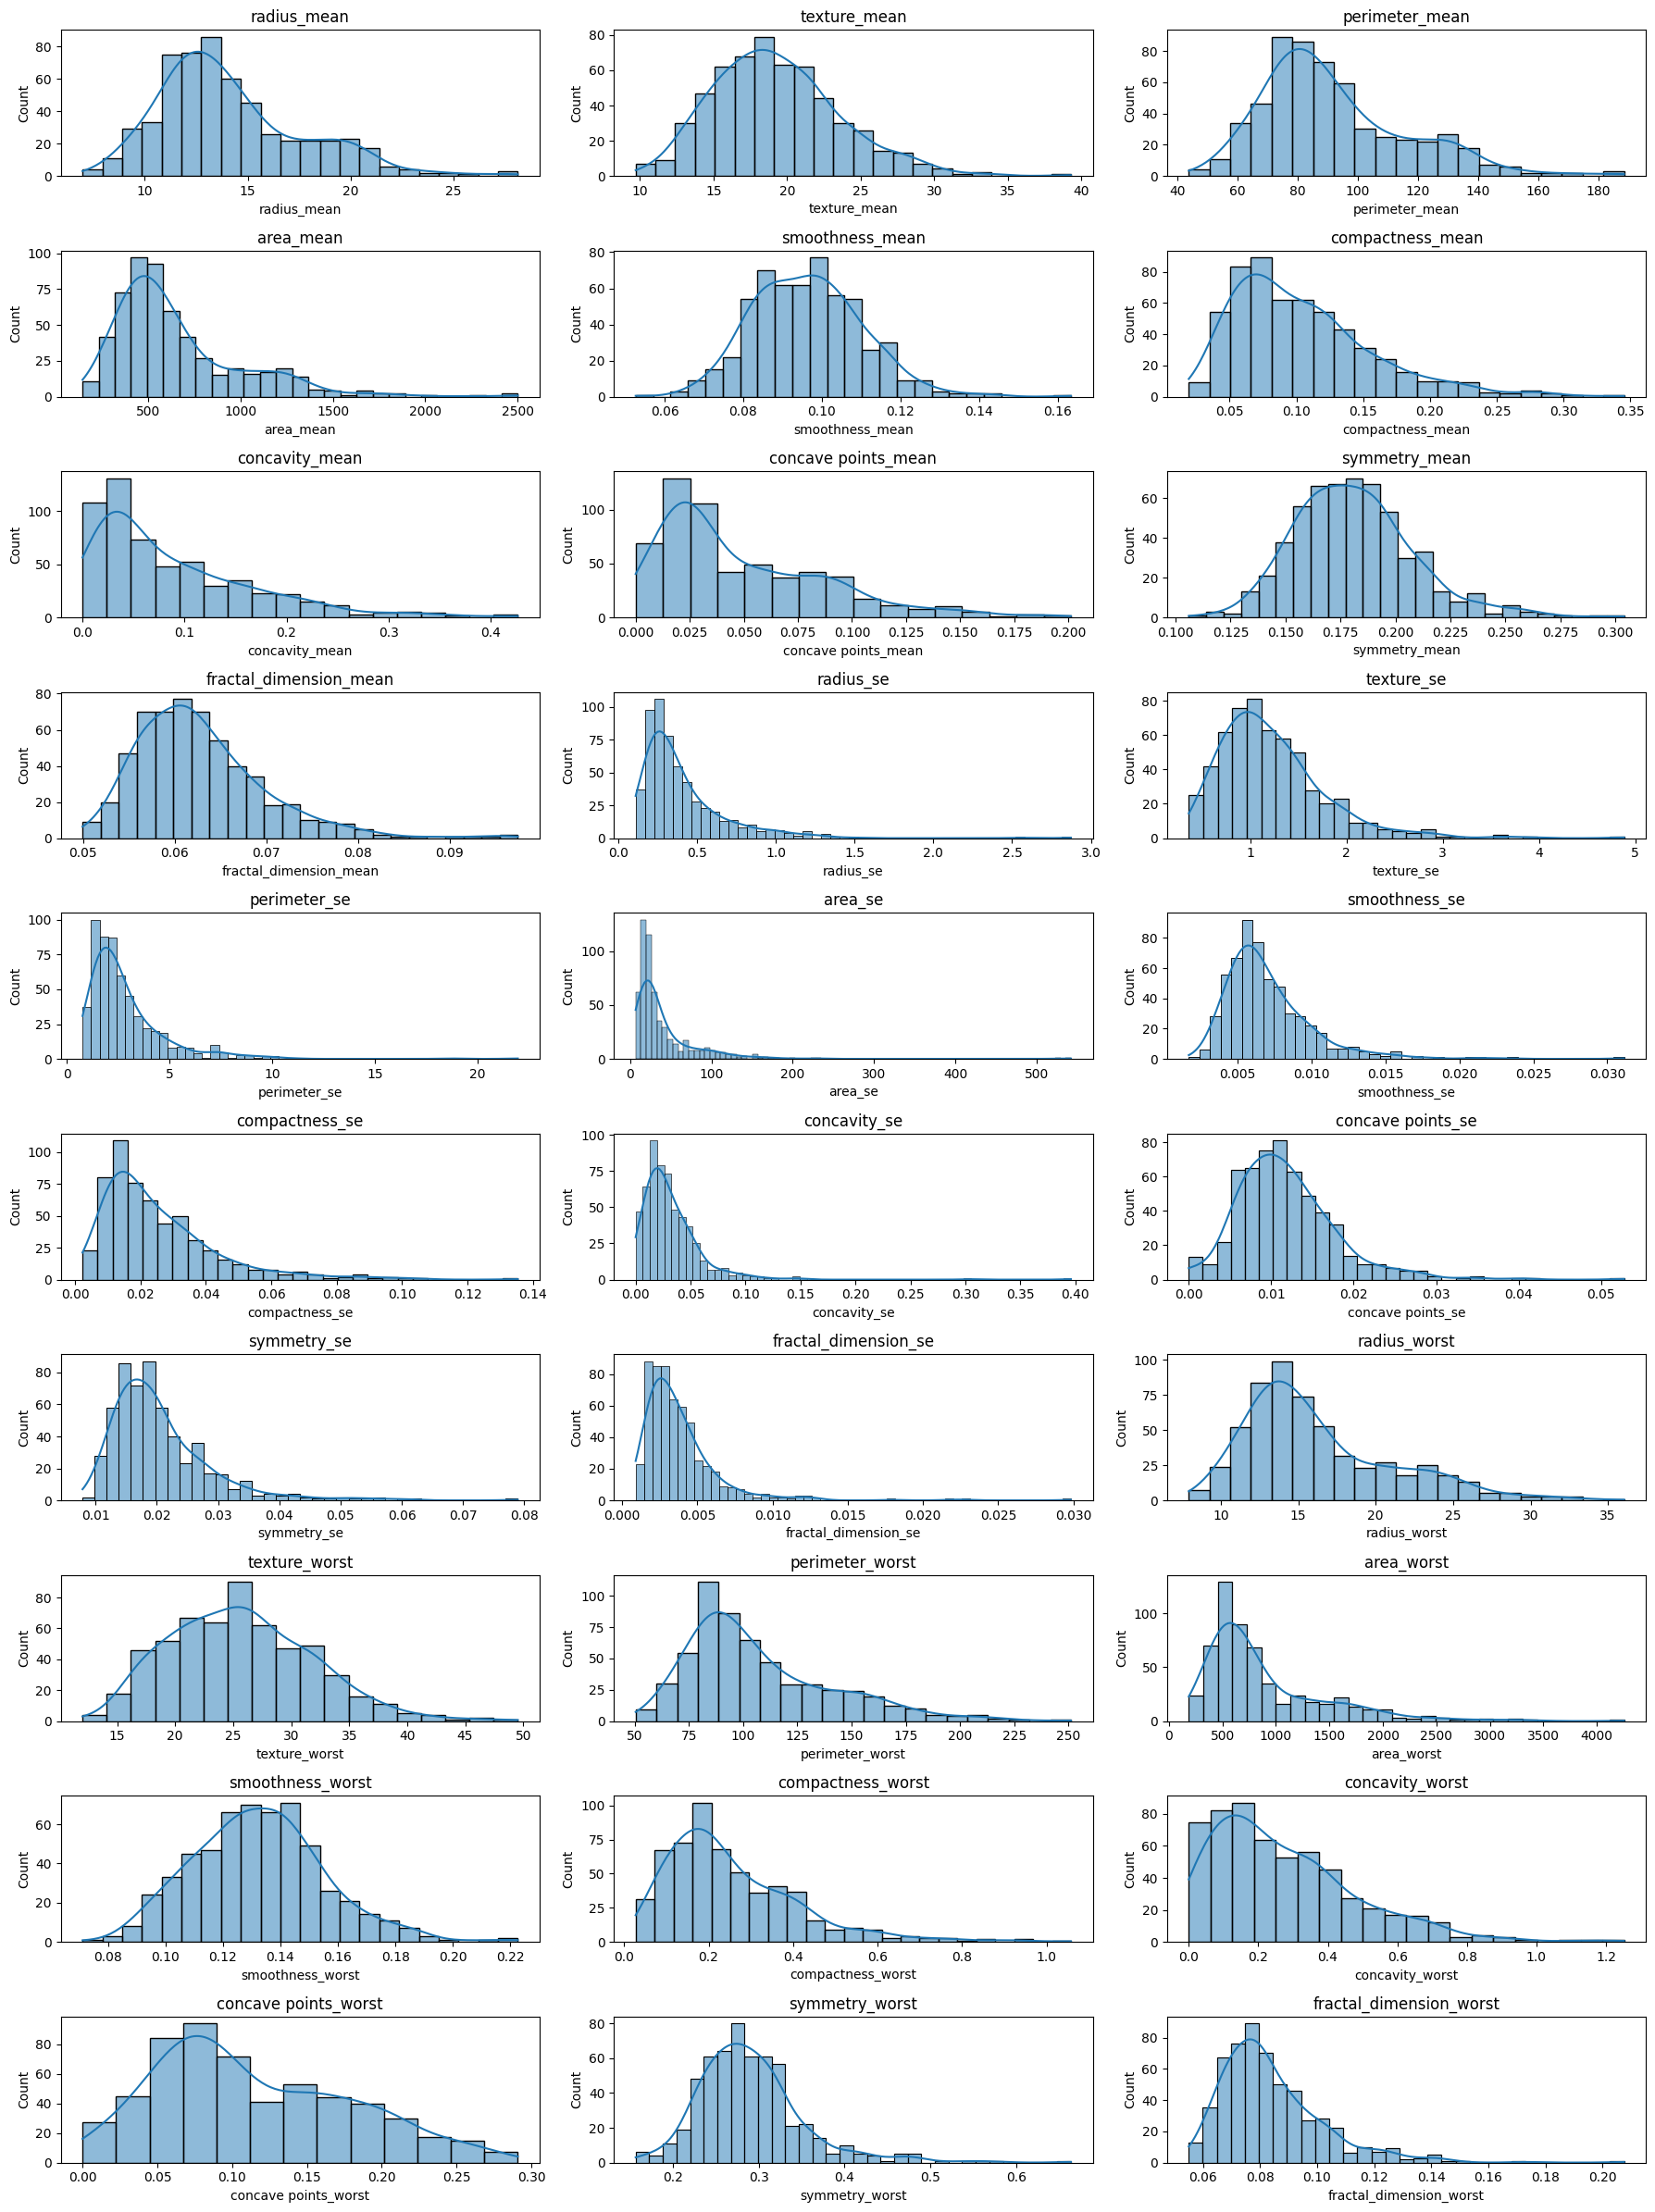

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the number of columns and rows for subplots
n_cols = 3
n_rows = len(num_col) // n_cols + (len(num_col) % n_cols > 0)

# Create subplots with a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 24))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(num_col):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<Axes: >

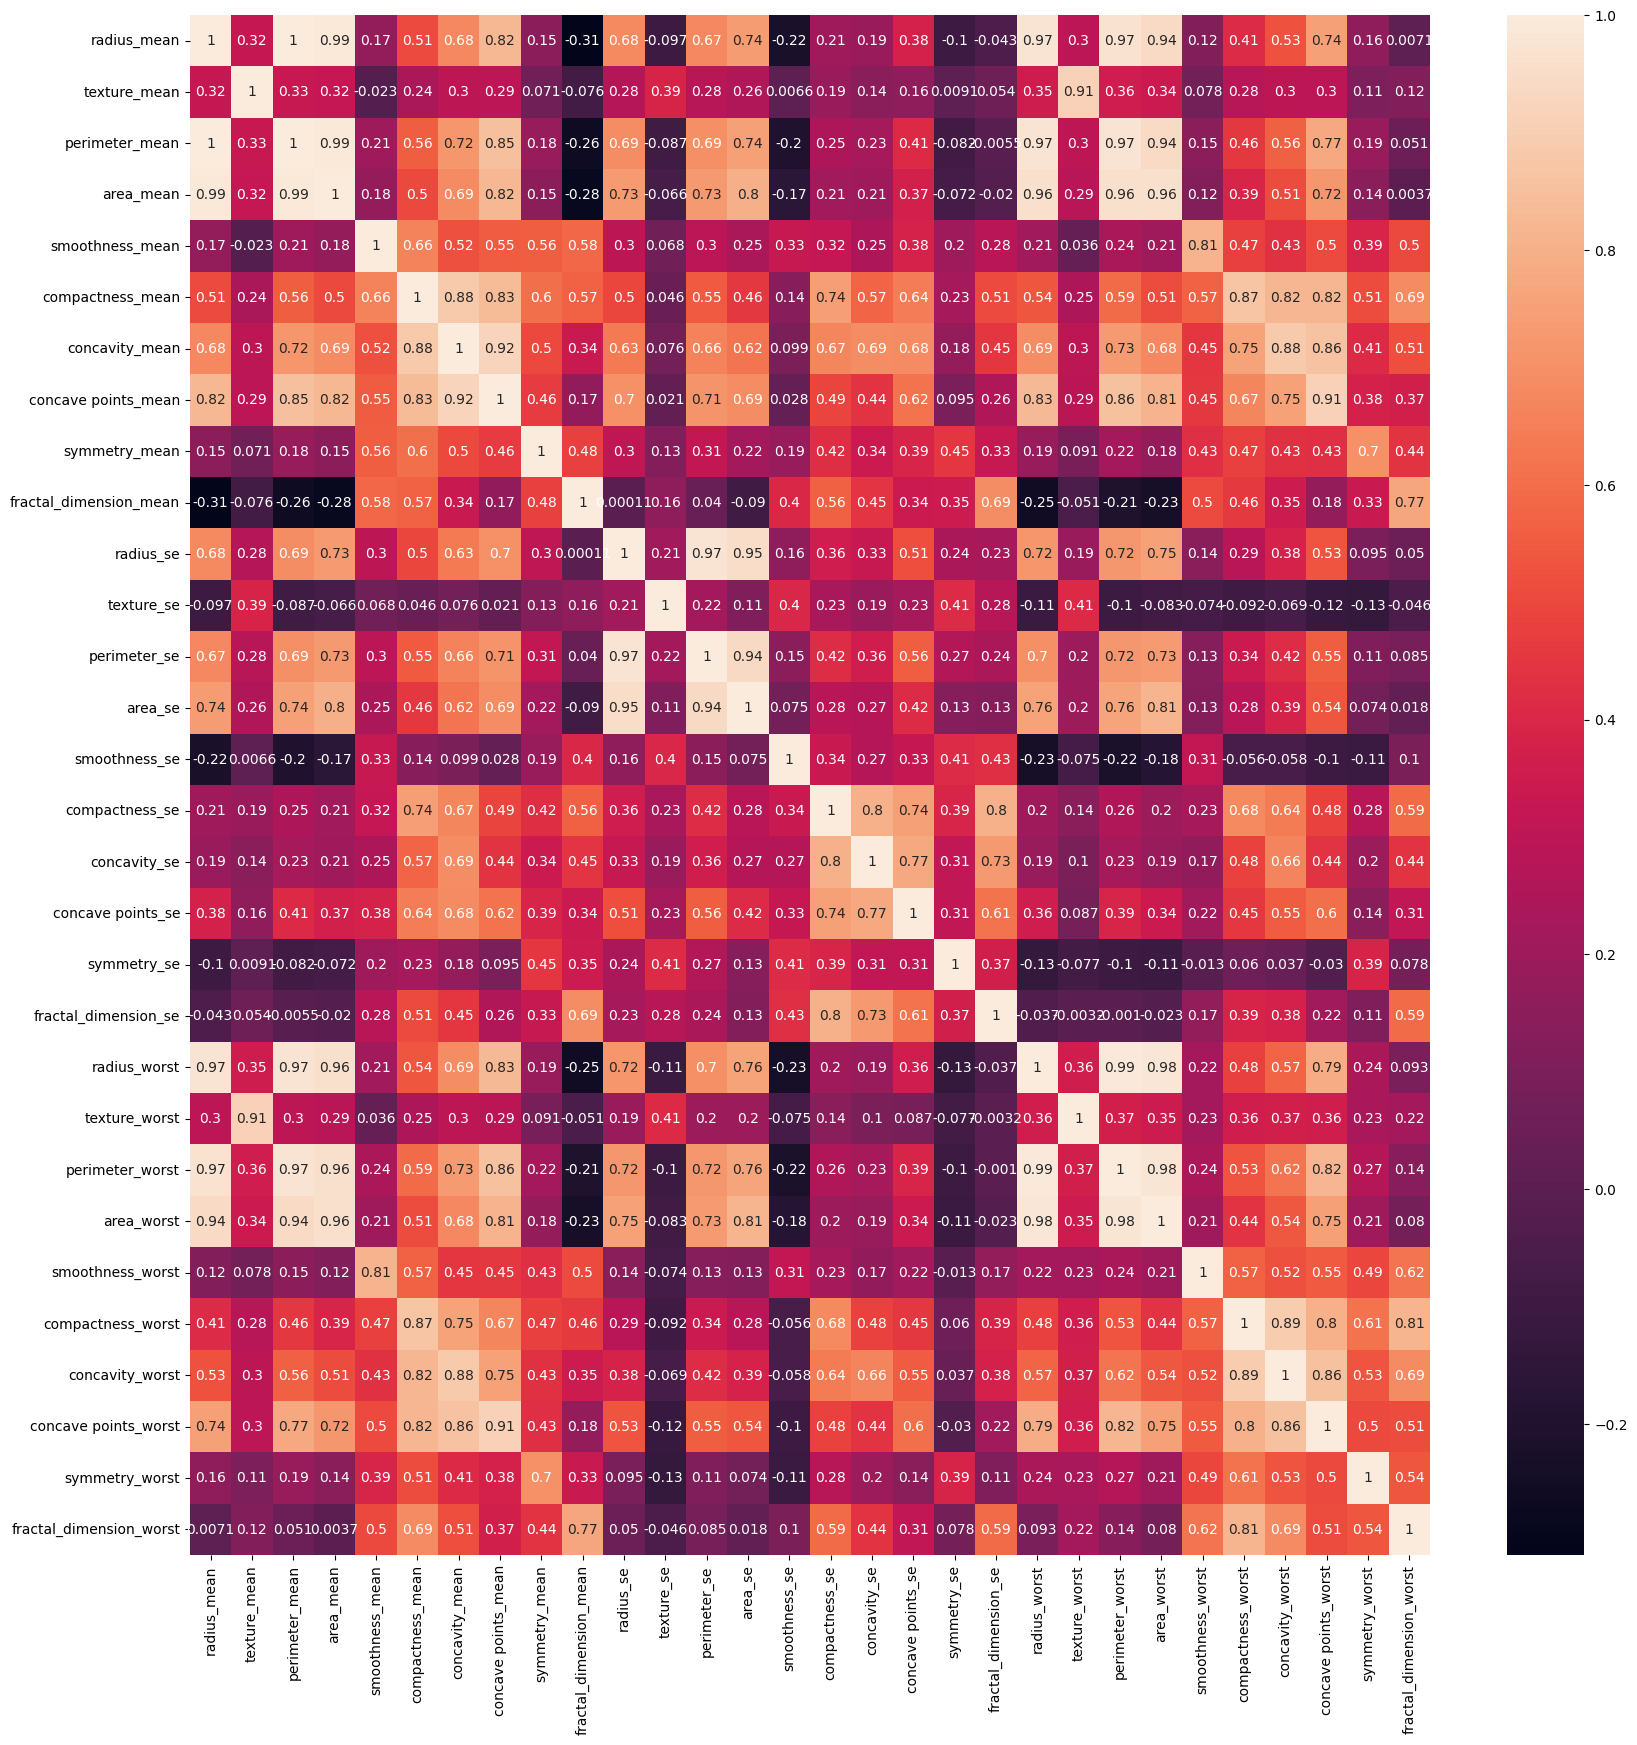

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(data[num_col].corr(), annot=True)

In [20]:
# changing the Diagnosis (categorical column) into numerical column

data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
# Splitting up the data for training and testing

X = data.drop(['diagnosis'],axis=1)
Y = data['diagnosis']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.2, random_state=12)

In [22]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_trans = scaler.fit_transform(x_train)
x_test_trans = scaler.transform(x_test)

In [23]:
print(x_train_trans)

[[-0.74690733 -0.15314549 -0.74844406 ... -0.69939209  0.25061804
  -0.00789101]
 [ 1.37401032  0.47672955  1.36455511 ...  0.93978226  0.20620223
   0.00778925]
 [-1.88167141  1.22269079 -1.85232606 ... -0.96125711 -0.13802031
   1.23398568]
 ...
 [-0.49824802 -1.01304317 -0.56019505 ... -1.11044464  0.03805666
  -0.79242675]
 [ 0.92934897 -0.57449535  0.90780579 ...  1.17426477  0.41400478
  -0.0972685 ]
 [-1.13013521 -1.61927103 -1.10914796 ... -0.69435622  0.0951627
  -0.30163457]]


Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
# fitting the model
logreg = LogisticRegression()
logreg.fit(x_train_trans, y_train)
y_pred_logreg = logreg.predict(x_test_trans)

In [26]:
# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg} \n")
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9758771929824561 



Confusion Matrix:
 [[283   2]
 [  9 162]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.99      0.95      0.97       171

    accuracy                           0.98       456
   macro avg       0.98      0.97      0.97       456
weighted avg       0.98      0.98      0.98       456



Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(x_train_trans, y_train)
y_pred_dtree = dtree.predict(x_test_trans)

In [29]:
# Evaluation
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Decision Tree Accuracy: {accuracy_dtree}")
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.9276315789473685


Confusion Matrix:
 [[277   8]
 [ 25 146]]


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       285
           1       0.95      0.85      0.90       171

    accuracy                           0.93       456
   macro avg       0.93      0.91      0.92       456
weighted avg       0.93      0.93      0.93       456



Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(x_train_trans, y_train)
y_pred_rf = rf.predict(x_test_trans)

In [32]:
# Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9627192982456141


Confusion Matrix:
 [[279   6]
 [ 11 160]]


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       285
           1       0.96      0.94      0.95       171

    accuracy                           0.96       456
   macro avg       0.96      0.96      0.96       456
weighted avg       0.96      0.96      0.96       456



Support Vector Machine (SVM)

In [33]:
from sklearn.svm import SVC

In [34]:
# Support Vector Machine
svm = SVC()
svm.fit(x_train_trans, y_train)
y_pred_svm = svm.predict(x_test_trans)

In [35]:
# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print("\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.9649122807017544


Confusion Matrix:
 [[279   6]
 [ 10 161]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       285
           1       0.96      0.94      0.95       171

    accuracy                           0.96       456
   macro avg       0.96      0.96      0.96       456
weighted avg       0.96      0.96      0.96       456



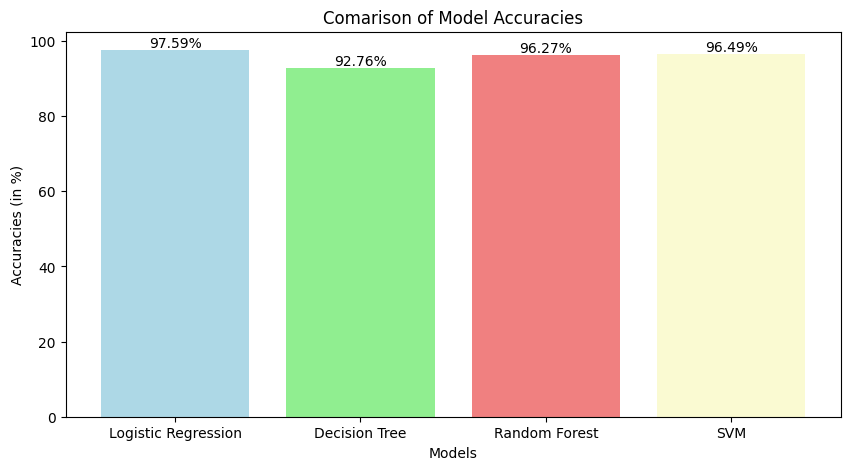

In [36]:
# comparison of 4 models

accuracies = {
    "Logistic Regression": accuracy_logreg,
    "Decision Tree": accuracy_dtree,
    "Random Forest": accuracy_rf,
    "SVM": accuracy_svm
}

plt.figure(figsize = (10,5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color = ['#ADD8E6', '#90EE90', '#F08080', '#FAFAD2'])
plt.xlabel("Models")
plt.ylabel("Accuracies (in %)")
plt.title("Comarison of Model Accuracies")

# Change y-ticks to show percentage values
plt.yticks(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=[0, 20, 40, 60, 80, 100])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')


plt.show()

## Deep Neural Networks using tensorflow

In [44]:
# import necessary libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
# applying early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=0)

In [63]:
# create an object for the Sequential model
model = Sequential()

In [64]:
# input layer
model.add(Dense(32, activation='relu', input_dim= 30))

# hidden layers
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

# fitting model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# training the model

history = model.fit(x_train_trans, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 852ms/step - accuracy: 0.3063 - loss: 0.8051 - val_accuracy: 0.2174 - val_loss: 0.8034
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2968 - loss: 0.7720 - val_accuracy: 0.1739 - val_loss: 0.7668
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3714 - loss: 0.7416 - val_accuracy: 0.2174 - val_loss: 0.7311
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4299 - loss: 0.7178 - val_accuracy: 0.5217 - val_loss: 0.7061
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5016 - loss: 0.7072 - val_accuracy: 0.7391 - val_loss: 0.6883
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6565 - loss: 0.6821 - val_accuracy: 0.7826 - val_loss: 0.6761
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6469 - loss: 0.6789 - val_accuracy: 0.8696 - val_loss: 0.6587
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7372 - loss: 0.6634 - val_accuracy: 0.8696 - val_loss

In [66]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test_trans, y_test, verbose=1)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9678 - loss: 0.1017
Test Accuracy: 97.15%


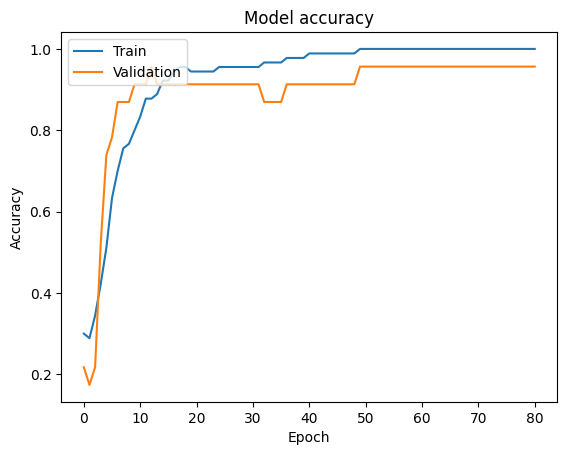

In [67]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

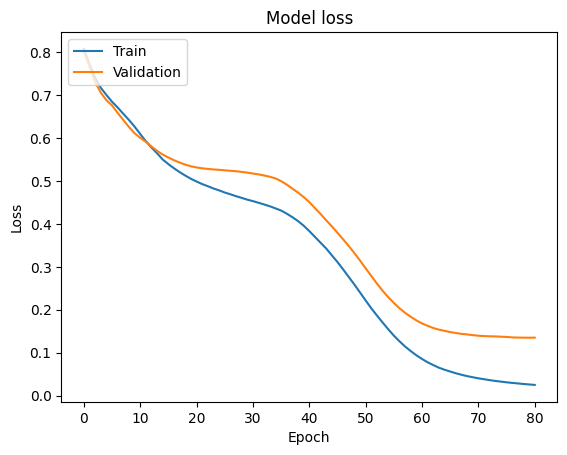

In [68]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In this project, multiple machine learning models and a deep learning model were employed to classify benign and malignant breast cancer instances based on the Wisconsin Breast Cancer dataset. The primary objective was to identify the best-performing model to achieve high accuracy and reliability.

Summary of Model Performances:
### Logistic Regression: Accuracy = 97.59%
- Logistic regression performed exceptionally well, providing one of the highest accuracies. It is a simple, interpretable model that was able to effectively distinguish between benign and malignant cases.

### Decision Tree: Accuracy = 92.76%
- The decision tree model lagged behind other models with a slightly lower accuracy. While decision trees are highly interpretable, they can often overfit, leading to decreased generalization on unseen data.

### Random Forest: Accuracy = 96.27%
- The random forest model, being an ensemble technique, yielded a high accuracy close to logistic regression. Random forests are known to be robust and provide good generalization by combining multiple decision trees, reducing variance.

###Support Vector Machine (SVM): Accuracy = 96.49%
- The SVM model also performed well, demonstrating the ability to separate the two classes effectively. SVMs are known for their solid performance in high-dimensional spaces and were a strong contender in this classification task.

### Deep Learning (Sequential Model): Test Accuracy = 97.15%
- A sequential deep learning model was implemented using techniques like standard scaling and early stopping. This model achieved a high test accuracy, outperforming decision trees and random forests, but it was slightly behind logistic regression in this case. Deep learning models excel when there are large datasets, but the performance difference in smaller datasets like this one might not be very significant when compared to simpler algorithms.

# Conclusion
Logistic Regression emerged as the best-performing model, offering the highest accuracy of 97.59%. Given its simplicity and interpretability, it would be a strong candidate for deployment in real-world applications where transparency is key.
Deep Learning also performed competitively with an accuracy of 97.15%. While more computationally expensive, it could be leveraged if the dataset were to grow or become more complex.
Random Forest and SVM models provided strong performances, proving that ensemble methods and kernel-based techniques can work effectively for binary classification tasks.
Decision Tree, while not the top performer, still provided a reasonable accuracy of 92.76%. However, it may require further tuning or the use of ensemble techniques to boost its performance.